## Table of Contents
* [Introduction](#intro)
* [Transformer Architecture](#transformer_architecture)
    * [Transformer Encoder](#transformer_encoder)
    * [Transformer Decoder](#transformer_decoder)
    * [Positional Encoding](#positional_encoding)
* [Supplementary Material](#supplementary_material)
    * [Attention Mechanism](#attention_mechanism)
    * [Multi-Head Attention Mechanism](#multi-head_attention_mechanism)
    * [Masked Multi-Head Attention Mechanism](#masked_multi-head_attention_mechanism)
* [References](#references)

<a id='intro'></a>

## Introduction

Before transformers, the state of the art aproaches in sequence modeling were mostly based on recurrent neural networks. The problem with recurrent neural networks is their limitation is parallelization during training phase because of processing the sequence elements one at a time and it becomes more problematic when we have long sequences and the memory limit, limits batching across the examples.
Transformer, on the other hand, is a model architecture, entirely based on attention mechanism to consider long-term dependencies in the sequence and between input and output sequences and it allows notably more parallelization. 
In the following sections we first explain transformer architecture and then give an example of transformer models.



<a id='transformer_architecture'></a>
## Transformer Architecture

The main transformer model intruduced in Attention Is All You Need paper consists of two main parts: Encoder and Decoder.
The encoder and the decoder both consist of N = 6 similar layers.

![Transformer Model](images/transformer_model.jpg)

<a id='transformer_encoder'></a>
### Transformer Encoder

The architecture of each encoder layer is shown at the left side of the figure bellow. Each encoder layer is made of two sub-layers.
The first sub layer is multi-head self-attention block and the second sub-layer is a fully connected network. As you can see in the image below, Both sub-layers are wrapped by a residual connection followed by a layer normalization.

![Transformer Encoder](images/transformer_encoder.jpg)

<a id='transformer_decoder'></a>
### Transformer Decoder

The architecture of each decoder layer is shown at the right side of the figure below. The decoder consists of three sub-layers. A masked multi-head self attention, a masked multi-head attention and a fully connected feed forward network. The same as encoder part, the three sub-layers are wraped by a residual connection followed by a layer normalization. As you can see in the image below, the two of the multi-head attention inputs are from the output of the encoder stack. The third sub-layer which is called Masked Multi-Head Attention is a modification of self-attention module and ensures that the predictions for position i only attends to the known outputs which means the outputs at position less than i. That is because, for example if you are using transformer for machine translation task, the decoder input will be the translated sentence. Hence the transformer only should attent to the tokens of the sentence that has been translated until the current step, not to the whole translated sequence.

![Transformer Decoder](images/transformer_decoder.jpg)

<a id='positional_encoding'></a>
### Positional Encoding

Since the attention mechanism in transformer model doesn't consider any order for the token in the input sequence, it is needed to inject some information about the position of the tokens in the sequence. To do so, the transformer makes use of a kind of embedding which is called positional embedding and it has the same dimension as the input embeddings so it can be added to the input embeddings. There are multiple options for such an embedding that encodes the position in a sequence. The transformer model makes use of sine and cosine functions for this purpose.

$$PE_{(pos, 2i)} = sin(pos/10000^{2i/d_{model}}) $$
$$PE_{(pos, 2i+1)} = cos(pos/10000^{2i/d_{model}}) $$


In the above formula, pos is the position of token in the sequence and i is the position in the embedding. for example, if the token is the second token in the sentence and the positional embedding dimension is 100, for computing the 5th element in that embedding, the formula will be: 

$$PE_{(2, 5)} = cos(2/10000^{4/100})$$

Here is a visualization of positional embeddings for better understanding. You can see the visualization of a 100-dimentional positional embedding for a sequence with the maximum length of 30. As you can see, the tokens that are near each other in the sequence have similar positional embeddings and as the token gets farther away from another token, its positional embedding becomes more different.

In [7]:
import numpy as np

d_model = 100
max_len = 30
positional_encodings = np.zeros((max_len, d_model))
for pos in range(max_len):
    for i in range(d_model):
        if i % 2 == 0:
            positional_encodings[pos, i] = np.sin(pos/10000**(i/d_model))
        else:
            positional_encodings[pos, i] = np.sin(pos/10000**((i-1)/d_model))

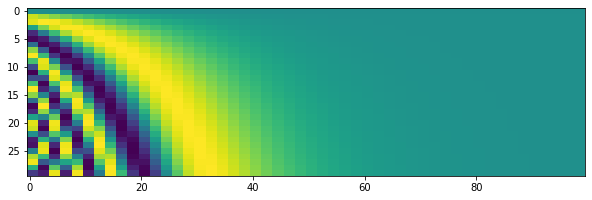

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(positional_encodings, interpolation='nearest')
plt.show()

<a id='supplementary_material'></a>
## Supplementary Material

In the following sections we get into more details in the attention mechanisms of the transformer model.

<a id='attention_mechanism'></a>
### Attention Mechanism

In this section we explain what attention mechanism is and how it works.
Attention mechanism first was introduced by [Dzmitry Bahdanau](https://arxiv.org/pdf/1409.0473.pdf) to improve the performance of encoder-decoder architectures in neural machine translation. It mentions that using a fixed-length vector is a bottleneck in the performance of encoder-decoder architectures and suggests that we use an architecture that allows the model to predict the target word by automatically attending to the parts of the input sentence that are relevant to the target word, regardless of how far the relevant parts are in that sentence in contrast to RNNs which as we go further in the sentence, we start forgetting about the past information in the sentence which means that the ability of RNNs in encoding long-term dependencies is limited which is fixed in attention mechanism.

Here is an example of the Attention Mechanism. 
Assume that we have a sequence of N tokens and each token in the sequence have a $d_k$-dimensional initial embedding, but these embeddings are computed independently, hence the context of the sentence is not encoded in those embeddings. Attention mechanism computes new embeddings for each token, so that, in addition to the information of that token, the information of other tokens in that sentence be considered in the embedding of that token. To do so, attention mechanism, computes the embedding of that token by using a weighted sum of the embeddings of tokens in that sentence. Actually not exactly the weighted sum of initial embeddings, but the weighted sum of a transformation of the initial embeddings.

if $h_j$ is the $j^{th}$ token of the input sequence and $c_i$ is the $i^{th}$ new contextualized embedding, we will have:
$$
\begin{aligned}
q_j = fc^q(h_j) \\
k_j = fc^k(h_j) \\
v_j = fc^v(h_j) \\
K = [k_1, ..., k_N] \\
\alpha_{i} = softmax(\frac{<q_i,K>}{\sqrt{d_k}}) \\
c_i = \sum_{j = 1}^{N} \alpha_{ij} \times h_j \\
\end{aligned}
$$

What we explained above was the process of self attention because the initial embeddings of query, key and values were the same, if the query input embeddings be different than key and value input embeddings, we call it attention mechanism.

<a id='multi-head_attention_mechanism'></a>
### Multi-Head Attention Mechanism

Multi-Head Attention Mechanism is the same as attention mechanism except that instead of having one attenion mechanism we will split the Query, Key and Value embeddings into N parts and passes each splitted part through a separate attention mechanism which is called attention head and at the end, it merges the output of attention heads into one embedding by concatenation which will be the output of Multi-Head Attention Mechanism.
This makes the attention mechanism to be able to encode different kinds of relations between the tokens of input sequence.

![Multi-Head Attention Mechanism](images/multi-head_attention.png)

<a id='masked_multi-head_attention_mechanism'></a>
### Masked Multi-Head Attention Mechanism

Masked Multi-Head Attention works almost the same as Multi-Head Attention except that it masks out the padding and future words in the target sequence.

![Masked Multi-Head Attention Mechanism](images/masked_multi-head_attention.png)

<a id='references'></a>
## References
* [Attention Is All You Need](https://arxiv.org/abs/1706.03762)
* [What is Transformer](https://medium.com/inside-machine-learning/what-is-a-transformer-d07dd1fbec04)
* [Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/abs/1409.0473)
* [The Attention Mechanism From Scratch](https://machinelearningmastery.com/the-attention-mechanism-from-scratch/#:~:text=The%20idea%20behind%20the%20attention,being%20attributed%20the%20highest%20weights.)
* [Transformers Explained Visually (Part 3): Multi-head Attention, deep dive](https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853)